In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [91]:
data_fake = pd.read_csv('archive/Fake.csv')
data_true = pd.read_csv('archive/True.csv')

In [92]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [93]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [94]:
data_fake["class"] = 0
data_true["class"] = 1

In [95]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [96]:
# Merge datasets
df = pd.concat([data_fake, data_true], ignore_index=True)

In [97]:
# Check missing values
print(df.isnull().sum())

# Check duplicates
print(df.duplicated().sum())

# Data types and structure
print(df.info())

title      0
text       0
subject    0
date       0
class      0
dtype: int64
209
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [98]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.head())

                                                   title  \
9942   HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...   
11446  FORMER DEMOCRAT WARNS Young Americans: “Rioter...   
14925  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...   
23926  Senate tax bill stalls on deficit-focused 'tri...   
24259  Trump warns 'rogue regime' North Korea of grav...   

                                                    text       subject  \
9942   No time to waste   we've got to fight with eve...      politics   
11446   Who is silencing political speech, physically...      politics   
14925  They were probably just looking for a  safe sp...      politics   
23926  WASHINGTON (Reuters) - The U.S. Senate on Thur...  politicsNews   
24259  BEIJING (Reuters) - U.S. President Donald Trum...  politicsNews   

                     date  class  
9942          Sep 9, 2017      0  
11446        Mar 10, 2017      0  
14925        Nov 16, 2015      0  
23926  November 30, 2017       1  
24259   November 8,

In [99]:
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values)  # Shows missing percentage

title      0.0
text       0.0
subject    0.0
date       0.0
class      0.0
dtype: float64


In [100]:
df["text_length"] = df["text"].apply(len)
print(df["text_length"].describe())  # Summary of text lengths

count    44898.000000
mean      2469.109693
std       2171.617091
min          1.000000
25%       1234.000000
50%       2186.000000
75%       3105.000000
max      51794.000000
Name: text_length, dtype: float64


In [101]:
df = df.drop_duplicates()
print(f"New shape after dropping duplicates: {df.shape}")

New shape after dropping duplicates: (44689, 6)


count    44689.000000
mean      2467.098682
std       2173.612347
min          1.000000
25%       1232.000000
50%       2185.000000
75%       3101.000000
max      51794.000000
Name: text_length, dtype: float64


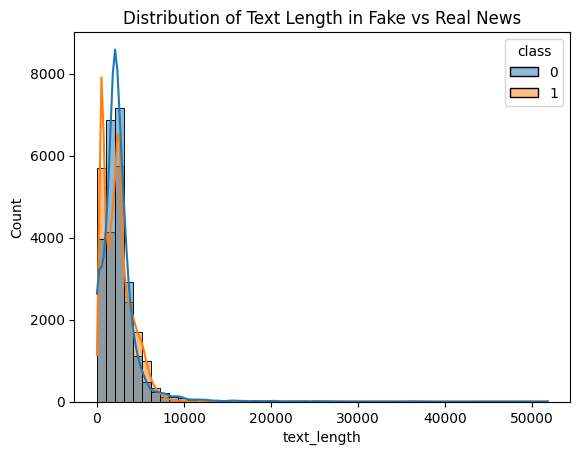

In [102]:
df["text_length"] = df["text"].apply(len)
print(df["text_length"].describe())  # Summary of text lengths

# Visualize text length distribution
sns.histplot(data=df, x="text_length", hue="class", bins=50, kde=True)
plt.title("Distribution of Text Length in Fake vs Real News")
plt.show()

In [103]:
df = df.dropna(subset=["text"])

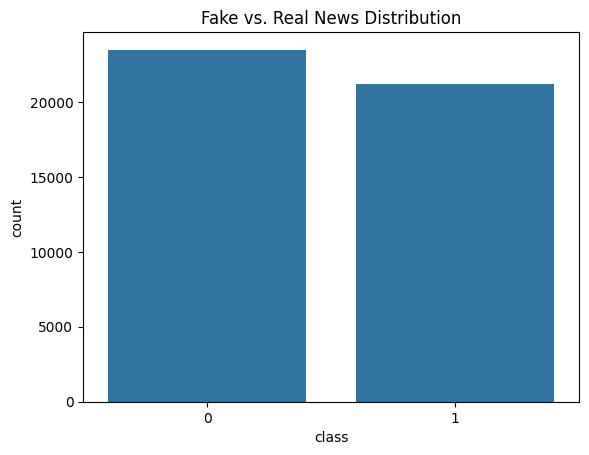

In [104]:
sns.countplot(x=df["class"])
plt.title("Fake vs. Real News Distribution")
plt.show()

In [105]:
# Compute Text Length
df["text_length"] = df["text"].apply(len)

# Splitting fake and real news data
fake_news = df[df["class"] == 0]
real_news = df[df["class"] == 1]


In [106]:
# Performing T-test (assumes normality)
t_stat, p_val_ttest = stats.ttest_ind(fake_news["text_length"], real_news["text_length"], equal_var=False)

# Performing Mann-Whitney U Test (non-parametric)
u_stat, p_val_mannwhitney = stats.mannwhitneyu(fake_news["text_length"], real_news["text_length"], alternative='two-sided')

# Displaying results
print(f"📌 T-Test Results:")
print(f"   - T-statistic: {t_stat:.4f}")
print(f"   - p-value: {p_val_ttest:.4f}")

print(f"\n📌 Mann-Whitney U Test Results:")
print(f"   - U-statistic: {u_stat:.4f}")
print(f"   - p-value: {p_val_mannwhitney:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_val_ttest < alpha:
    print("\n🚨 Reject the Null Hypothesis (T-test): There is a significant difference in text length between fake and real news.")
else:
    print("\n✅ Fail to Reject the Null Hypothesis (T-test): No significant difference in text length.")

if p_val_mannwhitney < alpha:
    print("\n🚨 Reject the Null Hypothesis (Mann-Whitney U test): There is a significant difference in text length.")
else:
    print("\n✅ Fail to Reject the Null Hypothesis (Mann-Whitney U test): No significant difference in text length.")

📌 T-Test Results:
   - T-statistic: 8.4019
   - p-value: 0.0000

📌 Mann-Whitney U Test Results:
   - U-statistic: 252658519.0000
   - p-value: 0.0072

🚨 Reject the Null Hypothesis (T-test): There is a significant difference in text length between fake and real news.

🚨 Reject the Null Hypothesis (Mann-Whitney U test): There is a significant difference in text length.


In [107]:
# Compute Lexical Diversity (Unique Words / Total Words)
df["lexical_diversity"] = df["text"].apply(lambda x: len(set(x.split())) / len(x.split()) if len(x.split()) > 0 else 0)

# Splitting fake and real news data
fake_news = df[df["class"] == 0]
real_news = df[df["class"] == 1]

# Performing T-test (assumes normality)
t_stat, p_val_ttest = stats.ttest_ind(fake_news["lexical_diversity"], real_news["lexical_diversity"], equal_var=False)

# Performing Mann-Whitney U Test (non-parametric)
u_stat, p_val_mannwhitney = stats.mannwhitneyu(fake_news["lexical_diversity"], real_news["lexical_diversity"], alternative='two-sided')

# Displaying results
print(f"📌 T-Test Results:")
print(f"   - T-statistic: {t_stat:.4f}")
print(f"   - p-value: {p_val_ttest:.4f}")

print(f"\n📌 Mann-Whitney U Test Results:")
print(f"   - U-statistic: {u_stat:.4f}")
print(f"   - p-value: {p_val_mannwhitney:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_val_ttest < alpha:
    print("\n🚨 Reject the Null Hypothesis (T-test): There is a significant difference in lexical diversity between fake and real news.")
else:
    print("\n✅ Fail to Reject the Null Hypothesis (T-test): No significant difference in lexical diversity.")

if p_val_mannwhitney < alpha:
    print("\n🚨 Reject the Null Hypothesis (Mann-Whitney U test): There is a significant difference in lexical diversity.")
else:
    print("\n✅ Fail to Reject the Null Hypothesis (Mann-Whitney U test): No significant difference in lexical diversity.")

📌 T-Test Results:
   - T-statistic: -25.3396
   - p-value: 0.0000

📌 Mann-Whitney U Test Results:
   - U-statistic: 219624544.0000
   - p-value: 0.0000

🚨 Reject the Null Hypothesis (T-test): There is a significant difference in lexical diversity between fake and real news.

🚨 Reject the Null Hypothesis (Mann-Whitney U test): There is a significant difference in lexical diversity.


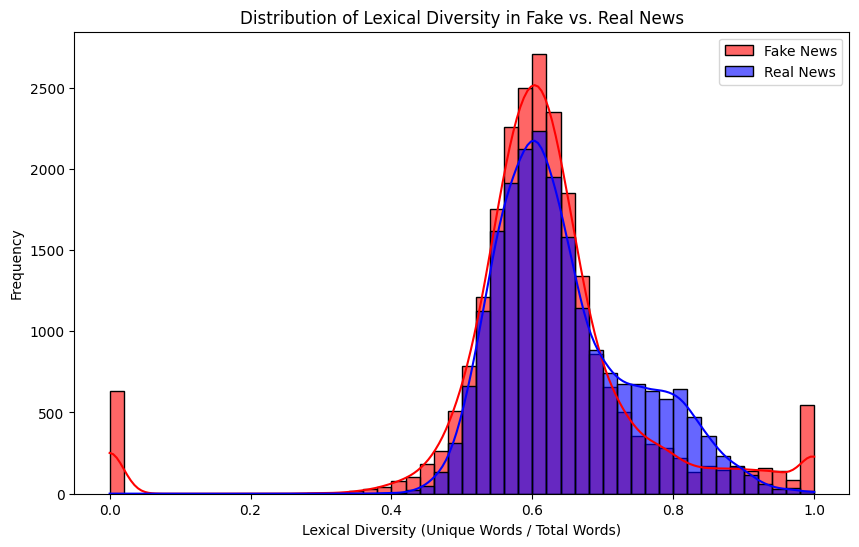

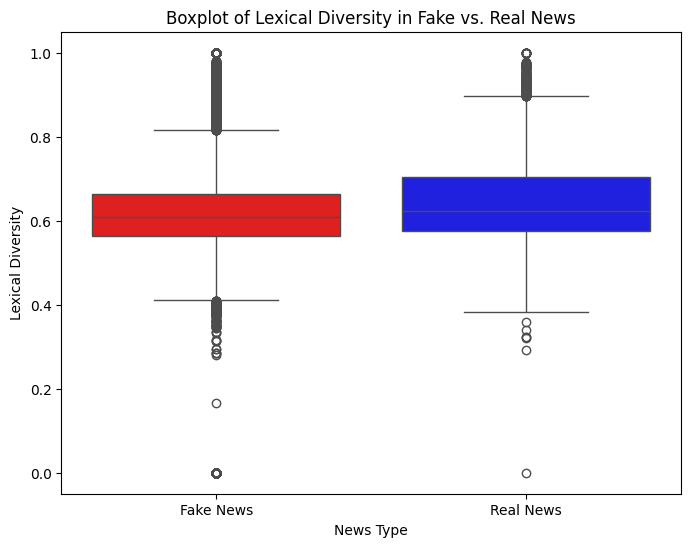

In [108]:
# Histogram of Lexical Diversity
plt.figure(figsize=(10, 6))
sns.histplot(fake_news["lexical_diversity"], bins=50, color="red", label="Fake News", kde=True, alpha=0.6)
sns.histplot(real_news["lexical_diversity"], bins=50, color="blue", label="Real News", kde=True, alpha=0.6)
plt.xlabel("Lexical Diversity (Unique Words / Total Words)")
plt.ylabel("Frequency")
plt.title("Distribution of Lexical Diversity in Fake vs. Real News")
plt.legend()
plt.show()

# Boxplot of Lexical Diversity
plt.figure(figsize=(8, 6))
sns.boxplot(x="class", y="lexical_diversity", hue="class", data=df, palette={0: "red", 1: "blue"}, dodge=False)
plt.xticks([0, 1], ["Fake News", "Real News"])
plt.xlabel("News Type")
plt.ylabel("Lexical Diversity")
plt.title("Boxplot of Lexical Diversity in Fake vs. Real News")
plt.legend([], [], frameon=False)  # Hides duplicate legend
plt.show()